<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Forecasting

In [6]:

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


In [2]:
# Read the monthly means CO2 levels dataset from Mauna Loa Observatory
# URL= https://gml.noaa.gov/ccgg/trends/data.html 

co2data = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/MaunaLoaCO2/co2_mm_mlo.csv"

# The file has Metadata first 56 lines
# The column names are in line 57
df_dist = pd.read_csv(co2data, header=0 , skiprows=56)


# Print the dataframe head.
df_dist.head()


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [ ]:
df_dist.tail()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
775,2022,10,2022.7917,415.78,419.13,30,0.27,0.10
776,2022,11,2022.8750,417.51,419.51,25,0.52,0.20
777,2022,12,2022.9583,418.95,419.64,24,0.50,0.20
778,2023,1,2023.0417,419.47,419.14,31,0.40,0.14
779,2023,2,2023.1250,420.41,419.49,25,0.64,0.25


In [ ]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            780 non-null    int64  
 1   month           780 non-null    int64  
 2   decimal date    780 non-null    float64
 3   average         780 non-null    float64
 4   deseasonalized  780 non-null    float64
 5   ndays           780 non-null    int64  
 6   sdev            780 non-null    float64
 7   unc             780 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 48.9 KB


In [3]:
# Create a dataset from year 1990 to present
df_last30 = df_dist[df_dist['year'] >= 1990]
df_last30.head()


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
382,1990,1,1990.0417,353.86,353.78,25,0.34,0.13
383,1990,2,1990.1250,355.10,354.37,28,0.66,0.24
384,1990,3,1990.2083,355.75,354.27,27,0.57,0.21
385,1990,4,1990.2917,356.38,353.76,28,0.55,0.20
386,1990,5,1990.3750,357.38,354.23,28,0.30,0.11


In [ ]:
# Combine 2 columns into string YearMonth
df = df_last30.copy()
df['YearMonth'] = df['year'].astype(str) + ' ' +  df['month'].astype(str)
df.head()


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,YearMonth
382,1990,1,1990.0417,353.86,353.78,25,0.34,0.13,1990 1
383,1990,2,1990.1250,355.10,354.37,28,0.66,0.24,1990 2
384,1990,3,1990.2083,355.75,354.27,27,0.57,0.21,1990 3
385,1990,4,1990.2917,356.38,353.76,28,0.55,0.20,1990 4
386,1990,5,1990.3750,357.38,354.23,28,0.30,0.11,1990 5


### Using the [Darts Library](https://unit8co.github.io/darts/README.html#).

In [ ]:
# Install the Darts library in Google Colab
!pip install --quiet darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build

In [ ]:
# Import two libraries from Darts
from darts import TimeSeries
from darts.models import ExponentialSmoothing


In [ ]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, 'YearMonth', 'average')

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [ ]:
# Fit an exponential smoothing model and make a prediction
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)


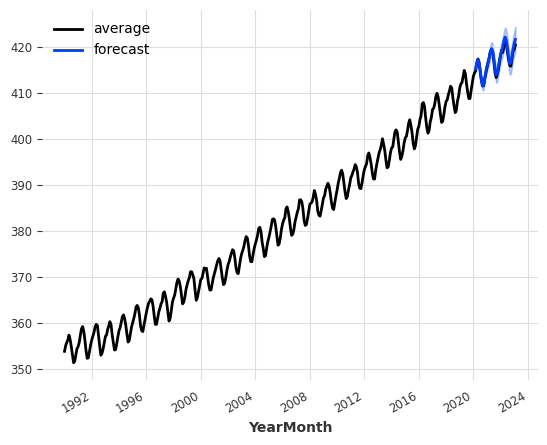

In [ ]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend();

## Using the [PyCaret Library](https://pycaret.gitbook.io/docs/)

The example in the tutorial is not reproducible... [See this example](https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/time-series-forecasting-with-pycaret-regression)

In [24]:
# Install the PyCaret Library
!pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [62]:
# Read Dataset
filename='https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/AirPassengers.csv'
df0 = pd.read_csv(filename)
df0.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [63]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [72]:
# Convert Month object to Date variable
df=df0.copy()
df['Date'] = pd.to_datetime(df['Month'])
# Drop the Month column
df.drop(['Month'], axis=1, inplace=True)
# Create a numeric year and month column
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df.head()

,#Passengers,Date,year,month
0,112,1949-01-01,1949,1
1,118,1949-02-01,1949,2
2,132,1949-03-01,1949,3
3,129,1949-04-01,1949,4
4,121,1949-05-01,1949,5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   #Passengers  144 non-null    int64         
 1   Date         144 non-null    datetime64[ns]
 2   year         144 non-null    int64         
 3   month        144 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.6 KB


In [74]:
# create 12 month moving average
df['#Pass_12'] = df['#Passengers'].rolling(12).mean()

# plot the data and MA

fig = px.line(df, x='Date', y=['#Passengers', '#Pass_12'], template = 'plotly_white')
fig.show()


In [75]:
df1=df.copy()
# create a sequence of numbers
df1['Series'] = np.arange(1,len(df)+1)

# drop unnecessary columns and re-arrange
df1.drop(['Date', '#Pass_12'], axis=1, inplace=True)
df2 = df1[['Series', 'year', 'month', '#Passengers']] 

# check the head of the dataset**
df2.head()


,Series,year,month,#Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121


In [76]:
# split data into train-test set
train = df2[df2['year'] < 1960]
test = df2[df2['year'] >= 1960]

# check shape
train.shape, test.shape


((132, 4), (12, 4))

In [77]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = '#Passengers', fold_strategy = 'timeseries', numeric_features = ['year', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,#Passengers
2,Target type,Regression
3,Original data shape,"(144, 4)"
4,Transformed data shape,"(144, 4)"
5,Transformed train set shape,"(132, 4)"
6,Transformed test set shape,"(12, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [78]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,44.3192,3050.6952,53.8852,-0.4522,0.1714,0.1521,0.1467
br,Bayesian Ridge,45.5643,3233.7133,55.6766,-0.6553,0.1765,0.1576,0.1567
ridge,Ridge Regression,45.7835,3257.2206,55.8542,-0.6687,0.1770,0.1585,0.0833
lar,Least Angle Regression,45.8053,3260.6009,55.8841,-0.6721,0.1771,0.1586,0.0867
lr,Linear Regression,45.8199,3263.7413,55.9068,-0.6728,0.1772,0.1586,1.2233
huber,Huber Regressor,46.0420,3308.9717,56.4600,-0.8186,0.1802,0.1618,0.1400
lasso,Lasso Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0867
llar,Lasso Least Angle Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0867
gbr,Gradient Boosting Regressor,52.4896,4355.4048,63.7434,-0.7220,0.2142,0.1618,0.3500
et,Extra Trees Regressor,52.5137,4610.3152,65.4170,-0.7951,0.2162,0.1613,0.3200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [79]:
omp_model = create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.8196,2503.0394,50.0304,-1.5293,0.2067,0.1854
1,33.3443,1708.9433,41.3394,0.3109,0.1351,0.1109
2,61.7936,4940.1030,70.2859,-0.1381,0.1724,0.1599
Mean,44.3192,3050.6952,53.8852,-0.4522,0.1714,0.1521
Std,12.4907,1374.7832,12.1276,0.7834,0.0292,0.0309


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
# Use the best model (OMP) to make prediction
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,484.7935,235277.5642,485.0542,-2204438.9317,3.8726,52.1733


In [81]:
# predict on new data
new_data = df2.copy()
predictions2 = predict_model(best, data = new_data)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,271.8992,86958.6944,294.8876,-112581.6405,3.3699,32.7393


In [83]:
predictions2.head()

,Series,year,month,#Passengers,prediction_label
0,1,1949,1,112,120.962681
1,2,1949,2,118,122.327867
2,3,1949,3,132,123.706393
3,4,1949,4,129,125.098368
4,5,1949,5,121,126.503906


In [84]:
# generate predictions on the original dataset**
predictions = predict_model(best, data=df2)

# add a date column in the dataset
predictions['Date'] = pd.date_range(start='1949-01-01', end = '1960-12-01', freq = 'MS')

# line plot
fig = px.line(predictions, x='Date', y=['#Passengers', 'prediction_label'], template = 'plotly_white')

# add a vertical rectange for test-set separation
fig.add_vrect(x0='1960-01-01', x1='1960-12-01', fillcolor='grey', opacity=0.25, line_width=0)

fig.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,271.8992,86958.6944,294.8876,-112581.6405,3.3699,32.7393


(Incomplete example ....)

## Using [sktime library](https://www.sktime.net/en/latest/index.html)

In [2]:
# Install sktime in Google Colab

!pip install --quiet sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 12.8 MB/s eta 0:00:00


In [15]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

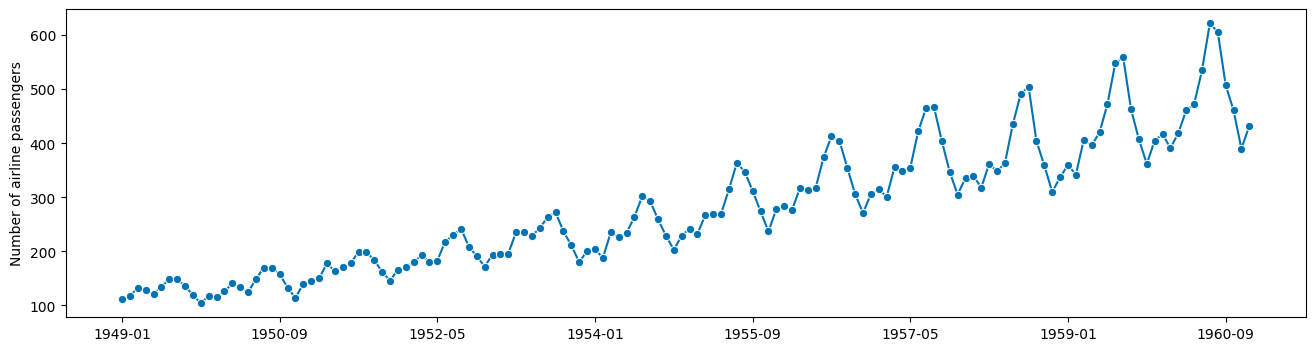

In [10]:
# in the example, we use the airline data set.
y = load_airline()
plot_series(y)

In [4]:
# Define a forecasting horizon 
from sktime.forecasting.base import ForecastingHorizon

In [11]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [12]:
# Define the forecasting algorithm

forecaster = NaiveForecaster(strategy="last")

In [13]:
# Fitting the forecaster to seen data
forecaster.fit(y)

NaiveForecaster()

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

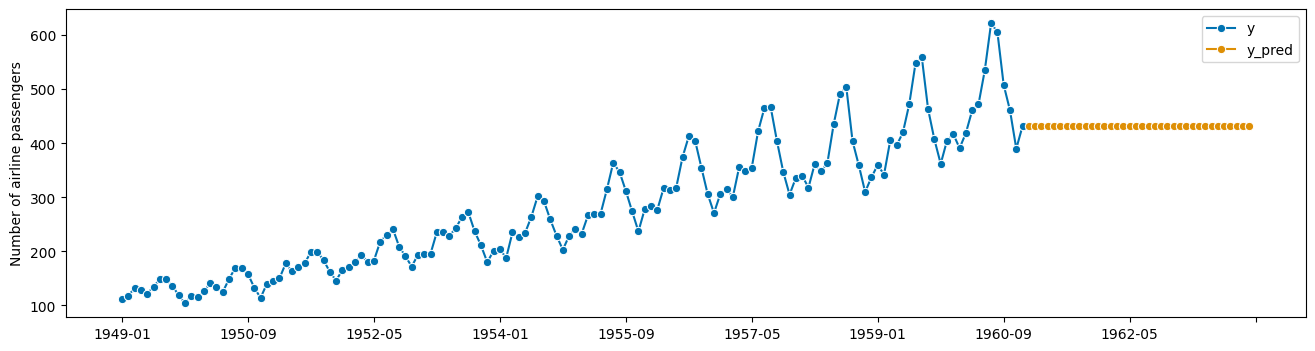

In [14]:
# Requesting forecasting
y_pred = forecaster.predict(fh)

# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])


In [16]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

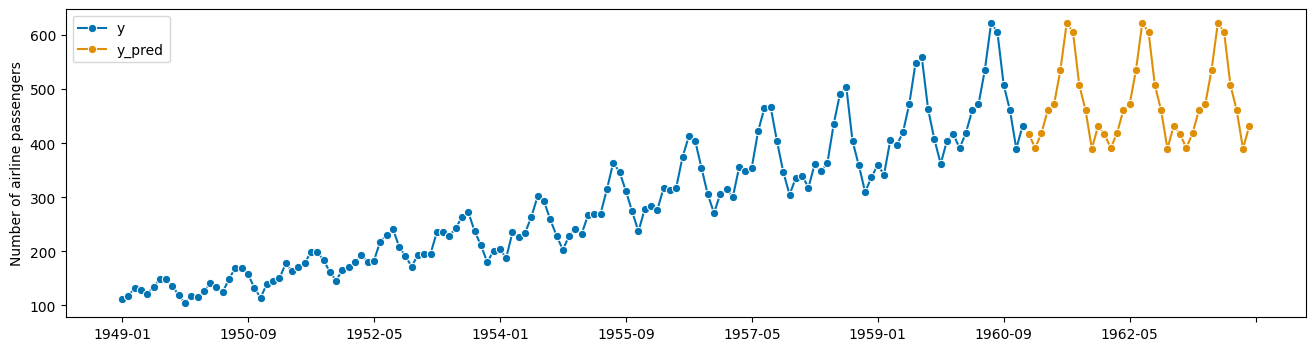

In [17]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"]);


In [18]:
# Another way. Using a temporal train and test split
from sktime.forecasting.model_selection import temporal_train_test_split

y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

108 36


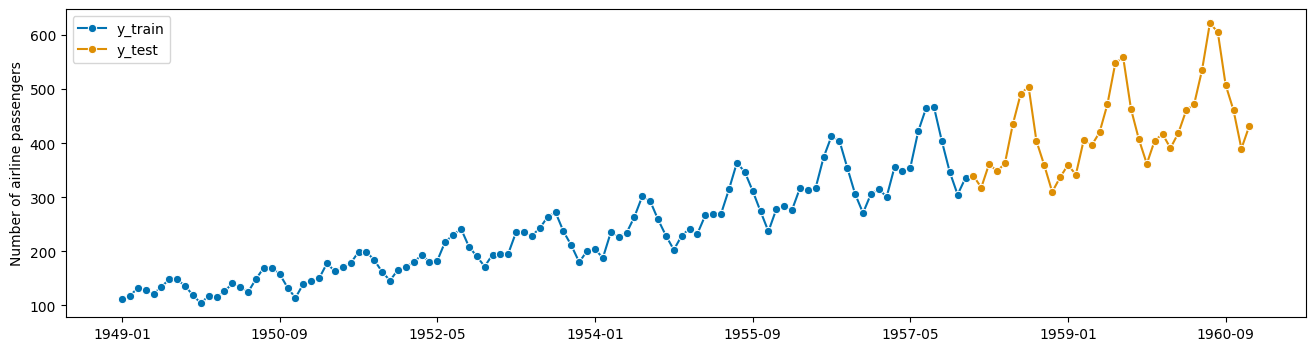

In [19]:
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])


In [21]:
# Making forecasts for y_tests from y_train
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

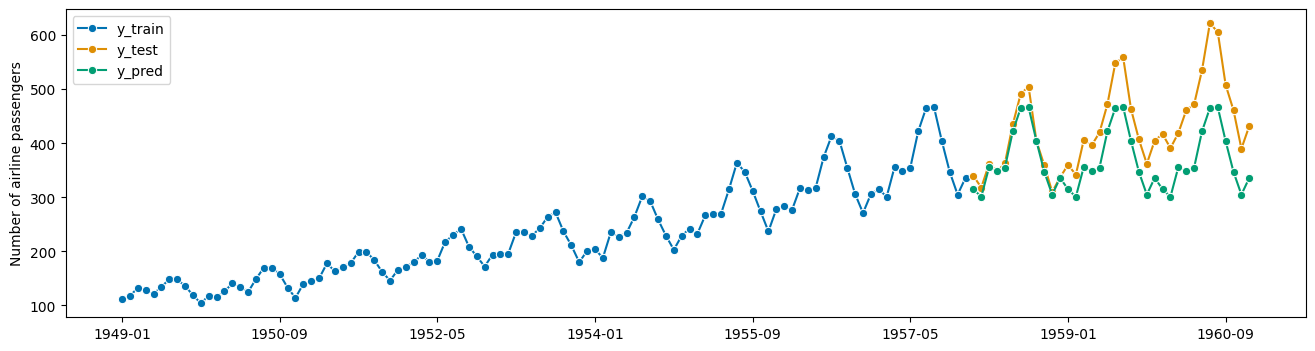

In [23]:
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);